# Module 5 Assignment

You've been asked to clean and explore a dataset containing racers in Mario Kart

Enter your student id, in the next cell, when asked and then run the next two cells. The second cell will create the dataset you will be working on. If you run the second cell again, it will generate a new dataset so be aware. Do not edit the next two cells.

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, do not edit
import random

# provide your student id as stud_id, replace 123456789 with your student id (automatice 0 if not replaced with your student id)
stud_id = 11711379
my_seed = random.seed(stud_id)

In [ ]:
# run this cell as is, do not edit
import pandas as pd
import numpy as np
import re
import random
from sklearn.datasets import make_regression

def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))

variables = ['Mario', 'Luigi', 'Peach', 'Daisy', 'Yoshi', 'Toad', 'Koopa Troopa', \
             'Bowser', 'Donkey Kong', 'Wario, Waluigi', 'Bowser Jr.', 'Diddy Kong', \
             'Toadette', 'Rosalina', 'Lakitu', 'Metal Mario', 'Petey', 'King Boo', \
             'Mii', 'Pauline', 'Lubba', 'Boom Boom', 'Boomette', 'Captain Syrup', \
             'Dixie Kong', 'E. Gadd', 'Kamek', 'Hammer Bro']

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

cats = [random.choice(['Mushroom Gorge', 'Choco Mountain']) for i in range(100)]
df[variables[16]] = cats
cats = [random.choice(['Green Shell', 'Red Shell']) for i in range(100)]
df[variables[17]] = cats
cats = [random.choice(['Fast', 'Medium', 'Slow']) for i in range(100)]
df[variables[18]] = cats
cats = [random.choice(['Bike', 'Buggy', 'Runner', 'Wiggler', 'Sprinter']) for i in range(100)]
df[variables[19]] = cats

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

df['Mario Kart'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

#df.to_csv('Mario Kart.csv', index=False) #comment this out after successful run so that you don't overwrite your data

### Data Prep

In [ ]:
# create dataframe from Mario Kart.csv
import pandas as pd
import numpy as np

Mario = pd.read_csv('/content/Mario Kart.csv');

In [ ]:
# df info

print(Mario.info())
Mario.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dixie Kong      106 non-null    int64  
 1   Daisy           106 non-null    object 
 2   Boomette        106 non-null    float64
 3   Mii             100 non-null    float64
 4   Yoshi           106 non-null    float64
 5   Luigi           106 non-null    float64
 6   Mario           106 non-null    float64
 7   Wario, Waluigi  98 non-null     float64
 8   Toad            106 non-null    float64
 9   Hammer Bro      106 non-null    float64
 10  Bowser Jr.      95 non-null     float64
 11  E. Gadd         106 non-null    float64
 12  Rosalina        106 non-null    float64
 13  Bowser          106 non-null    object 
 14  Lubba           96 non-null     float64
 15  Metal Mario     106 non-null    float64
 16  Koopa Troopa    106 non-null    int64  
 17  King Boo        106 non-null    obj

,Dixie Kong,Daisy,Boomette,Mii,Yoshi,Luigi,Mario,"Wario, Waluigi",Toad,Hammer Bro,...,E. Gadd,Rosalina,Bowser,Lubba,Metal Mario,Koopa Troopa,King Boo,Toadette,Captain Syrup,Mario Kart
0,7903,Sprinter,0.03,0.627956,-2.513809,0.043699,-1.043395,-0.641480,-2.031916,-0.520184,...,-0.0184,0.07,Choco Mountain,0.083512,-0.898873,527,Fast,Red Shell,-0.0184,-79.265910
1,5329,Wiggler,0.03,0.049451,0.184261,0.575769,0.781437,-0.429421,0.836786,0.828577,...,2.3501,0.07,Choco Mountain,NaN,0.620131,114,Slow,Red Shell,2.3501,390.166360
2,2752,Sprinter,0.03,2.194114,1.354679,-1.029112,-0.716607,-0.085101,0.998839,1.218868,...,-1.1313,0.07,Mushroom Gorge,1.458620,0.489341,103,Medium,Green Shell,-1.1313,1.111832
3,2470,Sprinter,0.03,1.438803,-0.844109,-0.287982,-1.997404,-1.859751,-0.278205,0.192182,...,1.8315,0.07,Mushroom Gorge,0.166892,-0.347902,730,Slow,Red Shell,1.8315,-38.480966
4,9780,Sprinter,0.03,1.485280,0.885121,-0.482387,-2.119938,-0.977015,0.218100,-0.311301,...,1.0919,0.07,Mushroom Gorge,1.143910,0.716657,597,Medium,Green Shell,1.0919,-149.017197


In [ ]:
# identify constants
Identify_constants = [
    const for const in Mario.columns if len(Mario[const].fillna(0).unique()) == 1
]

print('below are the constants')
print(Identify_constants)

below are the constants
['Boomette', 'Rosalina']


In [ ]:
# drop constant variables
Mario.drop(Identify_constants, axis=1, inplace=True)

In [ ]:
# identify quasi constant values (sometimes these may be boolean variables)
quasi_consts = []
for val in Mario.columns.sort_values():
    if (len(Mario[val].unique()) < 3):
        val_counts = Mario[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

Choco Mountain    0.528302
Mushroom Gorge    0.471698
Name: Bowser, dtype: float64
Red Shell      0.509434
Green Shell    0.490566
Name: Toadette, dtype: float64
quasi_consts []


In [ ]:
# drop the quasi constant variables with low cardinality where one label shows up 98% more times than other labels
Mario.drop(quasi_consts, axis=1, inplace=True)
Mario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dixie Kong      106 non-null    int64  
 1   Daisy           106 non-null    object 
 2   Mii             100 non-null    float64
 3   Yoshi           106 non-null    float64
 4   Luigi           106 non-null    float64
 5   Mario           106 non-null    float64
 6   Wario, Waluigi  98 non-null     float64
 7   Toad            106 non-null    float64
 8   Hammer Bro      106 non-null    float64
 9   Bowser Jr.      95 non-null     float64
 10  E. Gadd         106 non-null    float64
 11  Bowser          106 non-null    object 
 12  Lubba           96 non-null     float64
 13  Metal Mario     106 non-null    float64
 14  Koopa Troopa    106 non-null    int64  
 15  King Boo        106 non-null    object 
 16  Toadette        106 non-null    object 
 17  Captain Syrup   106 non-null    flo

In [ ]:
# identify duplicate rows
Mario[Mario.duplicated(keep=False)]

,Dixie Kong,Daisy,Mii,Yoshi,Luigi,Mario,"Wario, Waluigi",Toad,Hammer Bro,Bowser Jr.,E. Gadd,Bowser,Lubba,Metal Mario,Koopa Troopa,King Boo,Toadette,Captain Syrup,Mario Kart
5,4612,Wiggler,0.810431,-0.299993,-1.774420,-0.727761,-0.884425,-0.298721,0.961249,-0.299993,-1.0286,Mushroom Gorge,NaN,-1.335108,728,Slow,Red Shell,-1.0286,-171.942298
9,9332,Runner,2.695251,-0.118355,-0.273266,-0.336526,-0.403849,-2.241781,-0.792135,-0.118355,1.0337,Mushroom Gorge,1.292073,1.321392,386,Fast,Red Shell,1.0337,148.214433
13,4360,Wiggler,2.263032,-1.848753,-0.675570,0.742423,-0.851958,0.410371,-1.436602,-1.848753,-1.4810,Choco Mountain,0.096640,-1.119372,300,Medium,Green Shell,-1.4810,-144.550794
24,6392,Wiggler,0.913860,-0.200404,-0.550337,-0.544162,-0.168431,-0.370046,-0.226889,-0.200404,-0.3745,Choco Mountain,0.650246,-0.597128,194,Fast,Green Shell,-0.3745,-43.005061
27,4612,Wiggler,0.810431,-0.299993,-1.774420,-0.727761,-0.884425,-0.298721,0.961249,-0.299993,-1.0286,Mushroom Gorge,NaN,-1.335108,728,Slow,Red Shell,-1.0286,-171.942298
29,9385,Bike,0.071010,-0.268311,0.992759,-0.179871,-0.304115,1.264128,-0.545015,NaN,-0.6070,Choco Mountain,0.217179,0.608471,497,Fast,Red Shell,-0.6070,62.652437
45,9385,Bike,0.071010,-0.268311,0.992759,-0.179871,-0.304115,1.264128,-0.545015,NaN,-0.6070,Choco Mountain,0.217179,0.608471,497,Fast,Red Shell,-0.6070,62.652437
55,4360,Wiggler,2.263032,-1.848753,-0.675570,0.742423,-0.851958,0.410371,-1.436602,-1.848753,-1.4810,Choco Mountain,0.096640,-1.119372,300,Medium,Green Shell,-1.4810,-144.550794
61,9332,Runner,2.695251,-0.118355,-0.273266,-0.336526,-0.403849,-2.241781,-0.792135,-0.118355,1.0337,Mushroom Gorge,1.292073,1.321392,386,Fast,Red Shell,1.0337,148.214433
65,7308,Bike,0.589830,1.610800,-1.956458,-0.773407,-0.771548,-1.398124,0.745650,1.610800,0.8402,Choco Mountain,0.307187,-0.413314,791,Fast,Green Shell,0.8402,-105.619142


In [ ]:
# drop duplicate rows and print shape
Mario.drop_duplicates(inplace=True)
print(Mario.shape)

(100, 19)


In [ ]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(Mario.columns)):
    orig = Mario.columns[i]

    for dupe in Mario.columns[i + 1:]:
        if Mario[orig].equals(Mario[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

E. Gadd looks the same as Captain Syrup


['Captain Syrup']

### Imputation

Use histograms to view the shape of your numerical variables
* Use mean to replace missing data for normal (ish) variables
* Use median to replace missing data for skewed variables
* Use mode to replace missing data for categorical variables

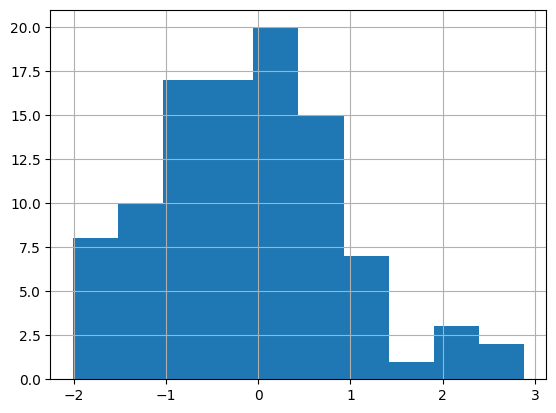

In [ ]:
# plot histograms
Mario['Luigi'].hist();

In [ ]:
# show null values for each variable
# df.isnull().sum()
Mario.isnull().sum()

Dixie Kong         0
Daisy              0
Mii                6
Yoshi              0
Luigi              0
Mario              0
Wario, Waluigi     8
Toad               0
Hammer Bro         0
Bowser Jr.        10
E. Gadd            0
Bowser             0
Lubba              9
Metal Mario        0
Koopa Troopa       0
King Boo           0
Toadette           0
Captain Syrup      0
Mario Kart         0
dtype: int64

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
Mario['Lubba'].fillna(round(Mario['Lubba'].mean(), 2), inplace=True)
Mario['Yoshi'].fillna(round(Mario['Yoshi'].mean(), 2), inplace=True)
Mario['Wario, Waluigi'].fillna(round(Mario['Wario, Waluigi'].mean(), 2), inplace=True)
Mario['Bowser Jr.'].fillna(Mario['Bowser Jr.'].median(), inplace=True)
Mario.isnull().sum()

Dixie Kong        0
Daisy             0
Mii               6
Yoshi             0
Luigi             0
Mario             0
Wario, Waluigi    0
Toad              0
Hammer Bro        0
Bowser Jr.        0
E. Gadd           0
Bowser            0
Lubba             0
Metal Mario       0
Koopa Troopa      0
King Boo          0
Toadette          0
Captain Syrup     0
Mario Kart        0
dtype: int64

### Exploratory Data Analysis

In [ ]:
# describe df
Mario.describe()

,Dixie Kong,Mii,Yoshi,Luigi,Mario,"Wario, Waluigi",Toad,Hammer Bro,Bowser Jr.,E. Gadd,Lubba,Metal Mario,Koopa Troopa,Captain Syrup,Mario Kart
count,100.000000,94.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5806.400000,0.797339,0.047517,-0.098930,-0.094045,-0.701537,-0.075076,0.103204,0.074410,0.087788,0.849835,-0.026469,489.750000,0.087788,-1.865213
std,2311.266346,0.687407,0.999679,0.994557,0.982959,0.529261,1.067395,1.053257,0.980156,0.993806,0.572168,0.964535,257.302572,0.993806,134.938504
min,1111.000000,0.001588,-3.232873,-2.008783,-2.565552,-2.392573,-3.050934,-2.708422,-3.232873,-1.892300,-0.017507,-2.703651,102.000000,-1.892300,-326.137089
25%,3841.000000,0.199825,-0.484853,-0.815316,-0.658784,-0.979917,-0.620223,-0.563338,-0.418951,-0.657425,0.450640,-0.658257,268.750000,-0.657425,-94.954378
50%,6011.500000,0.602888,0.092119,-0.152769,-0.084971,-0.678836,-0.137856,0.017945,0.124840,0.108050,0.824768,-0.138715,453.000000,0.108050,-0.732665
75%,7616.500000,1.319788,0.598949,0.578084,0.690920,-0.248175,0.673044,0.823393,0.489062,0.683325,1.191293,0.613392,728.500000,0.683325,72.644607
max,9980.000000,2.695251,3.139673,2.881207,1.902341,-0.007101,2.378972,2.967649,3.139673,2.350100,2.414417,2.862515,972.000000,2.350100,390.166360


Using df.describe(), identify the two variables with max values greater than 100. These variables have scales that are quite different than the other variables and must be scaled so that they share the same scale as the other variables. Standardize one feature and Normalize the other feature.

In [ ]:

# standardize feature
from sklearn.preprocessing import StandardScaler

column_scales = ['Dixie Kong', 'Koopa Troopa', 'Mario Kart']

df['Koopa Troopa'] = (df['Koopa Troopa'] - df['Koopa Troopa'].mean()) / df['Koopa Troopa'].std()
print(df)

     Dixie Kong     Daisy Boomette                  Mii     Yoshi     Luigi  \
0          7903  Sprinter     0.03   0.6279557614403498 -2.513809  0.043699   
1          5329   Wiggler     0.03  0.04945071259023533  0.184261  0.575769   
2          2752  Sprinter     0.03   2.1941140307910834  1.354679 -1.029112   
3          2470  Sprinter     0.03   1.4388033947024317 -0.844109 -0.287982   
4          9780  Sprinter     0.03    1.485279938148535  0.885121 -0.482387   
..          ...       ...      ...                  ...       ...       ...   
101        5543  Sprinter     0.03   0.3132592578602267 -0.160119  0.219896   
102        3902    Runner     0.03   0.4408093167774946 -0.310889 -1.196477   
103        6954   Wiggler     0.03  0.04185186684217664 -0.413463 -1.245557   
104        9180     Buggy     0.03   0.7630940028834095 -1.275459  0.012174   
105        1111  Sprinter     0.03  0.04269961298055727  0.392026 -0.234752   

        Mario        Wario, Waluigi      Toad  Hamm

In [ ]:
# normalize feature
from sklearn.preprocessing import Normalizer

column_scales = ['Dixie Kong', 'Koopa Troopa', 'Mario Kart']
# Apply normalization to the 'Peach' column
df['Dixie Kong'] = (df['Dixie Kong'] - df['Dixie Kong'].min()) / (df['Dixie Kong'].max() - df['Dixie Kong'].min())
print(df)

     Dixie Kong     Daisy Boomette                  Mii     Yoshi     Luigi  \
0      0.765814  Sprinter     0.03   0.6279557614403498 -2.513809  0.043699   
1      0.475589   Wiggler     0.03  0.04945071259023533  0.184261  0.575769   
2      0.185026  Sprinter     0.03   2.1941140307910834  1.354679 -1.029112   
3      0.153230  Sprinter     0.03   1.4388033947024317 -0.844109 -0.287982   
4      0.977450  Sprinter     0.03    1.485279938148535  0.885121 -0.482387   
..          ...       ...      ...                  ...       ...       ...   
101    0.499718  Sprinter     0.03   0.3132592578602267 -0.160119  0.219896   
102    0.314692    Runner     0.03   0.4408093167774946 -0.310889 -1.196477   
103    0.658812   Wiggler     0.03  0.04185186684217664 -0.413463 -1.245557   
104    0.909798     Buggy     0.03   0.7630940028834095 -1.275459  0.012174   
105    0.000000  Sprinter     0.03  0.04269961298055727  0.392026 -0.234752   

        Mario        Wario, Waluigi      Toad  Hamm

In [ ]:
# describe data again to verify transformations
df.describe()

,Dixie Kong,Yoshi,Luigi,Mario,Toad,Hammer Bro,E. Gadd,Rosalina,Metal Mario,Koopa Troopa,Captain Syrup,Mario Kart
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,1.060000e+02,106.000000,106.000000
mean,0.536385,0.034214,-0.133305,-0.105885,-0.095678,0.085157,0.067562,7.000000e-02,-0.039452,-1.152118e-17,0.067562,-4.158224
std,0.260344,1.001270,1.003879,0.963482,1.075086,1.044905,0.993305,2.788743e-17,0.964546,1.000000e+00,0.993305,134.181946
min,0.000000,-3.232873,-2.008783,-2.565552,-3.050934,-2.708422,-1.892300,7.000000e-02,-2.703651,-1.518080e+00,-1.892300,-326.137089
25%,0.322359,-0.475755,-0.834102,-0.664664,-0.621143,-0.599986,-0.675675,7.000000e-02,-0.664925,-8.518242e-01,-0.675675,-105.148116
50%,0.555756,0.039774,-0.169572,-0.139574,-0.165845,0.005441,0.087850,7.000000e-02,-0.172180,-1.424575e-01,0.087850,-8.512790
75%,0.746251,0.575728,0.569267,0.673851,0.665977,0.818115,0.756575,7.000000e-02,0.610477,9.353096e-01,0.756575,71.287635
max,1.000000,3.139673,2.881207,1.902341,2.378972,2.967649,2.350100,7.000000e-02,2.862515,1.891583e+00,2.350100,390.166360


In [ ]:
# df.info()
Mario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 105
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dixie Kong      100 non-null    int64  
 1   Daisy           100 non-null    object 
 2   Mii             94 non-null     float64
 3   Yoshi           100 non-null    float64
 4   Luigi           100 non-null    float64
 5   Mario           100 non-null    float64
 6   Wario, Waluigi  100 non-null    float64
 7   Toad            100 non-null    float64
 8   Hammer Bro      100 non-null    float64
 9   Bowser Jr.      100 non-null    float64
 10  E. Gadd         100 non-null    float64
 11  Bowser          100 non-null    object 
 12  Lubba           100 non-null    float64
 13  Metal Mario     100 non-null    float64
 14  Koopa Troopa    100 non-null    int64  
 15  King Boo        100 non-null    object 
 16  Toadette        100 non-null    object 
 17  Captain Syrup   100 non-null    flo

In [ ]:
# check for outliers
for feat in Mario._get_numeric_data().columns[1:]:
    q1 = Mario[feat].quantile(0.25)
    q3 = Mario[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = Mario[feat][Mario[feat] < lower_fence].count()
    upper_count = Mario[feat][Mario[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

Mii outliers = 0: lower_fence: -1.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Yoshi outliers = 6: lower_fence: -2.0, upper_fence: 2.0, lower_count: 3, upper_count: 3
Luigi outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Mario outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Wario, Waluigi outliers = 3: lower_fence: -2.0, upper_fence: 1.0, lower_count: 3, upper_count: 0
Toad outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 0
Hammer Bro outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Bowser Jr. outliers = 6: lower_fence: -2.0, upper_fence: 2.0, lower_count: 3, upper_count: 3
E. Gadd outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Lubba outliers = 5: lower_fence: -1.0, upper_fence: 2.0, lower_count: 0, upper_count: 5
Metal Mario outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Koopa Tr

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort vif_data by VIF score in descending order
vif_data_sorted = vif.sort_values(by='VIF', ascending=False)

# Print the sorted DataFrame
print(vif_data_sorted)

         Variable       VIF
7         E. Gadd       inf
11  Captain Syrup       inf
12     Mario Kart  2.567735
3           Luigi  1.678536
4           Mario  1.421137
1      Dixie Kong  1.228131
9     Metal Mario  1.185993
6      Hammer Bro  1.110761
10   Koopa Troopa  1.085699
2           Yoshi  1.066711
5            Toad  1.053690
8        Rosalina  0.001370
0           const  0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# delete one of the variables out of the pair(s) that show multicollinearity
df = df.drop(columns=['E. Gadd'])

In [ ]:
# verify you no longer have multicollinearity
numeric_data= df._get_numeric_data()
cols=numeric_data.columns
predictors = numeric_data.columns.tolist()

# Remove the target variable "Mario Kart" from the list of predictors
predictors.remove("Mario Kart")

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors
vif_data["VIF"] = [variance_inflation_factor(numeric_data[predictors].values, i) for i in range(len(predictors))]

# Sort vif_data by VIF score in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Print the sorted DataFrame
print(vif_data_sorted)

        Variable       VIF
6       Rosalina  6.096820
0     Dixie Kong  1.201368
9  Captain Syrup  1.113022
5     Hammer Bro  1.090108
3          Mario  1.078981
1          Yoshi  1.066536
2          Luigi  1.064866
8   Koopa Troopa  1.055791
4           Toad  1.052336
7    Metal Mario  1.050724


<ipython-input-157-4c62840f65e0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


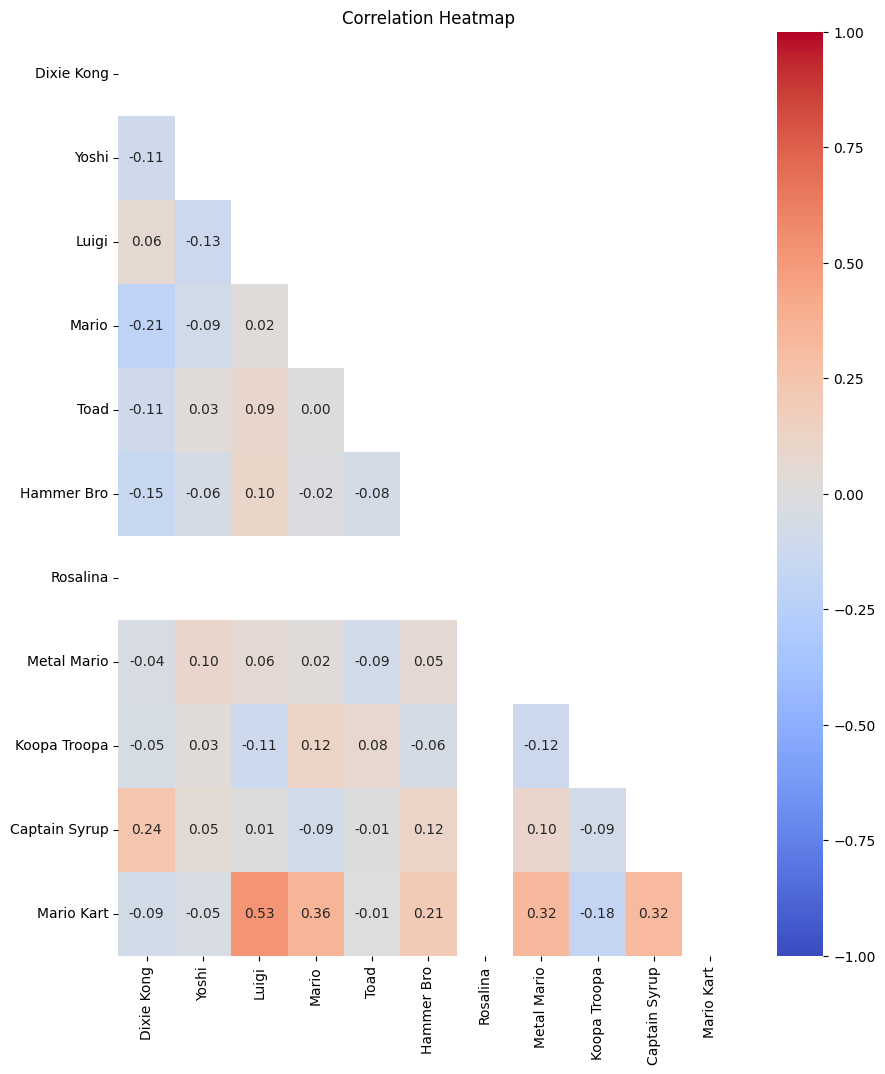

In [ ]:
# show correlation heat map for variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 12))
upper = np.triu(corr_matrix)  # This masks the upper triangle of the matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, mask=upper)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-155-baa3148bda7a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = df.corr()['Mario Kart'].sort_values(ascending=False)


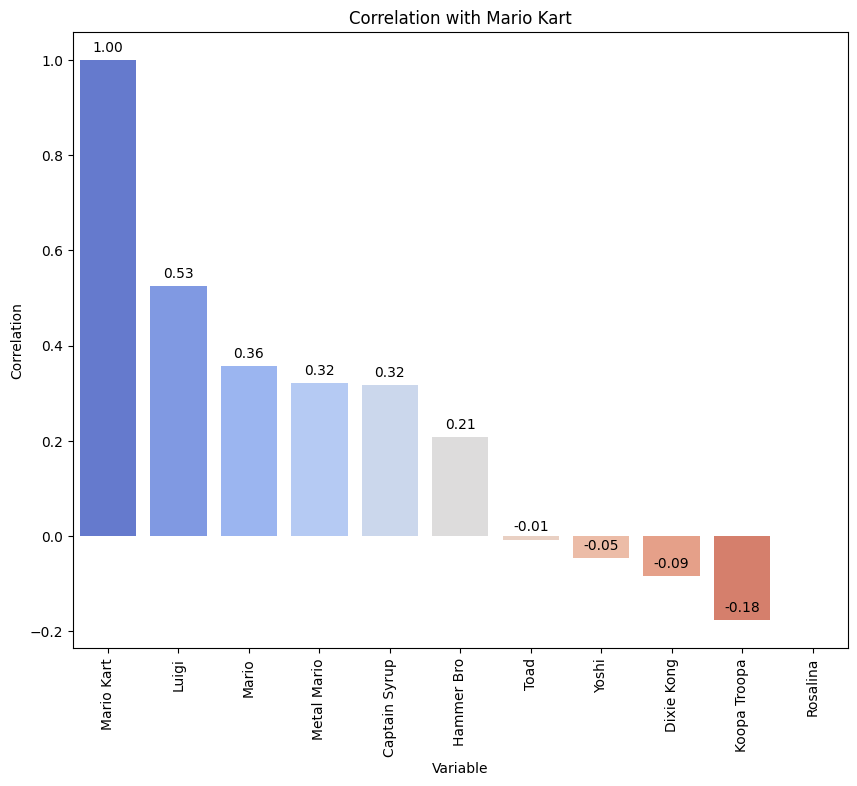

In [ ]:
# correlation with target
# change rot=45 to rot=90 (text rotation)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation with the target variable
corr_with_target = df.corr()['Mario Kart'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')
plt.title('Correlation with Mario Kart')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Change text rotation to 90 degrees

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

List four variables that show the most correlation with the Mario Kart

Mario, Metal Mario, Captain Syrup